In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Удобнее работать с этой библитекой - не тревожат лишние предупреждения
import warnings
warnings.filterwarnings('ignore')

# Описание датафрейма
    ClientPeriod - время использования услугами;
    MonthlySpending - расходы за месяц
    TotalSpent - общие расходы абонента;
    Sex - пол;
    IsSeniorCitizen - является ли абонент пенсионером;
    HasPartner - есть ли у абонента супруг или супруга;
    HasChild - есть ли у абонента дети;
    HasPhoneService - подключение телефонной связи;
    HasMultiplePhoneNumbers - подключение телефона к нескольким линиям одновременно;
    HasInternetService - тип подключения;
    HasOnlineSecurityService - блокировка опасных сайтов;
    HasOnlineBackup - облачное хранилище файлов для резервного копирования данных;
    HasDeviceProtection - антивирус;
    HasTechSupportAccess - выделенная линия технической поддержки;
    HasOnlineTV - стриминговое телевидение;
    HasMovieSubscription - каталог фильмов;
    HasContractPhone - имеет контактный телефон;
    IsBillingPaperless - электронный расчётный лист;
    PaymentMethod - тип платежа;
    Churn - отток абонентов.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/JesseHeisenberg/binnopharm_test/refs/heads/main/train.csv', sep=',')
df.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


# Задание, пайтон.

1.	Изучение данных, понимание структуры
2.	Обработка данных. Выводы, какие проблемы были
3.	Исследовательский анализ данных. Выводы
4.	Портрет пользователя, который ушел. Выводы, какие группы людей чаще уходят.

------
# Изучение данных, понимание структуры и обработка данных (пропусков)

In [ ]:
# Выводжу информаю по данным: кол-во записей, типы данных, количество нулевых значений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

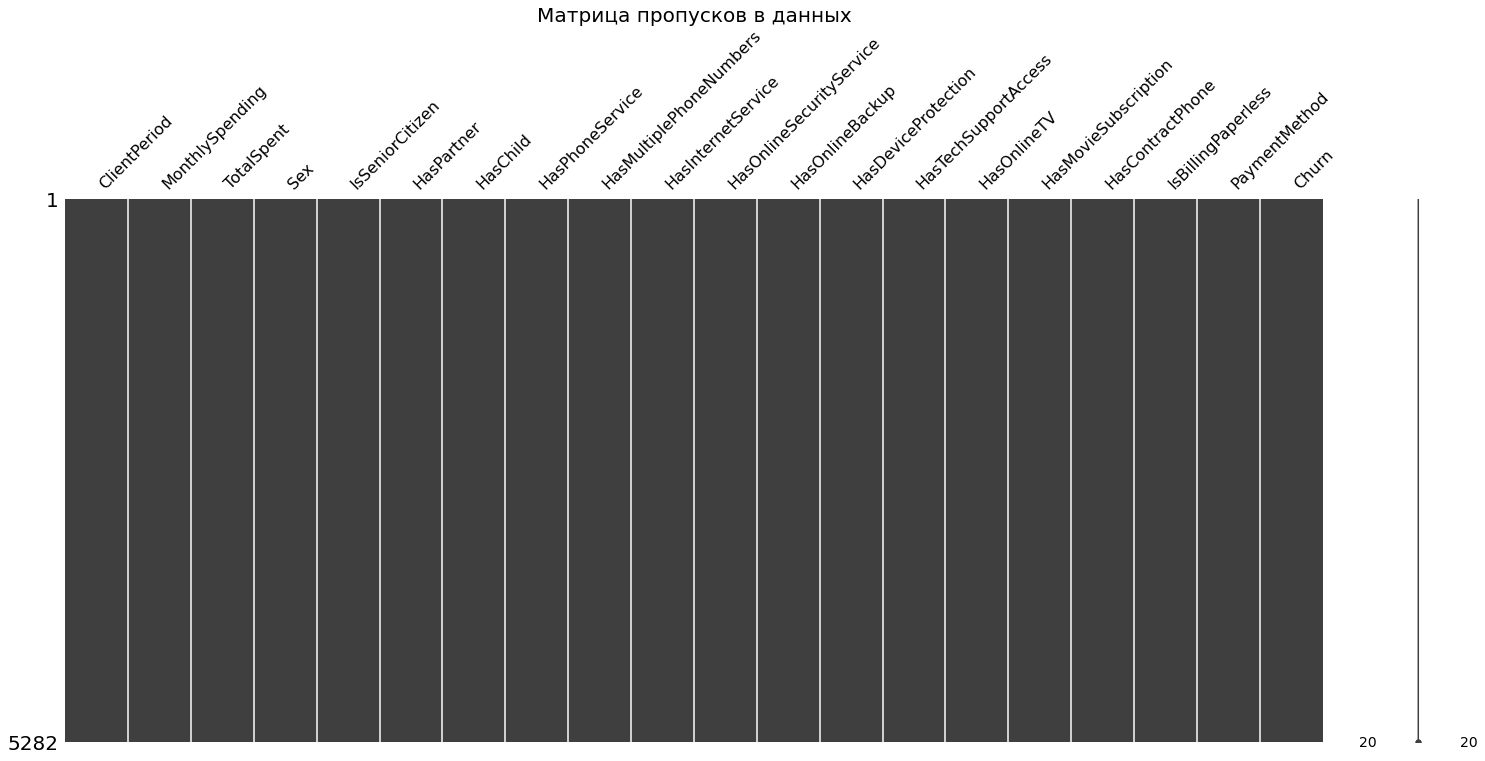

In [ ]:
msno.matrix(df)
plt.title('Матрица пропусков в данных', fontsize=20)
plt.show()

In [ ]:
"""
1. Выглядит, что TotalSpent должен быть численным, нашел что есть пропуски в данных в виде пробелов (хотя матрица пропусков этого не показала)
2. Дополнительно проверяем на другие символы пропусков, которые могут быть
"""

symbols_to_check = [' ', '?', 'NULL', 'N/A', 'NaN', 'unknown']

for symbol in symbols_to_check:
    count = (df == symbol).sum().sum()
    print(f'Символ "{symbol}": {count}')

# Дополниетльно проверил сумму по каждому столбцу count = (df == symbol).sum() --- пропуски только в TotalSpent

Символ " ": 9
Символ "?": 0
Символ "NULL": 0
Символ "N/A": 0
Символ "NaN": 0
Символ "unknown": 0


In [ ]:
# Пропуски только в виде пробелов, поэтому заменяем их
df['TotalSpent'] = df['TotalSpent'].replace(' ', np.nan).astype('float64')

In [ ]:
print(f'Теряем при удалении: {9 / 5282 * 100:.2f}%')
df.dropna(inplace=True)

Теряем при удалении: 0.17%


In [ ]:
# Смотрю индексы, хранящиеся в IsSeniorCitizen и Churn
print(df['IsSeniorCitizen'].value_counts())
print(df['Churn'].value_counts())

0    4431
1     842
Name: IsSeniorCitizen, dtype: int64
0    3889
1    1384
Name: Churn, dtype: int64


In [ ]:
# IsSeniorCitizen и Churn привожу к типу object, чтобы сэкономить по памяти и для работы с графиками в будущем
df['IsSeniorCitizen'] = df['IsSeniorCitizen'].astype('object')
df['Churn'] = df['Churn'].astype('object')

In [ ]:
"""
1. Вывожу описание численных данных
2. Заметно, что довольно большое стандартное отклоенене во всех трех
   параметрах. Скорее всего нет нормального распределения данных + обращаю внимание
   на минимуму и гарницу 1 квартиля, при таком std очень маленькая разница в ClientPeriod
   НАДО ОБРАТИТЬ НА ЭТО ВНИМАНИЕ В ЧАСТИ ГРАФИКОВ

"""
df.describe()

,ClientPeriod,MonthlySpending,TotalSpent
count,5273.000000,5273.000000,5273.000000
mean,32.452304,64.956770,2291.390461
std,24.534723,30.177911,2269.014233
min,1.000000,18.250000,18.800000
25%,9.000000,35.500000,401.100000
50%,29.000000,70.450000,1410.250000
75%,55.000000,90.050000,3807.350000
max,72.000000,118.750000,8684.800000


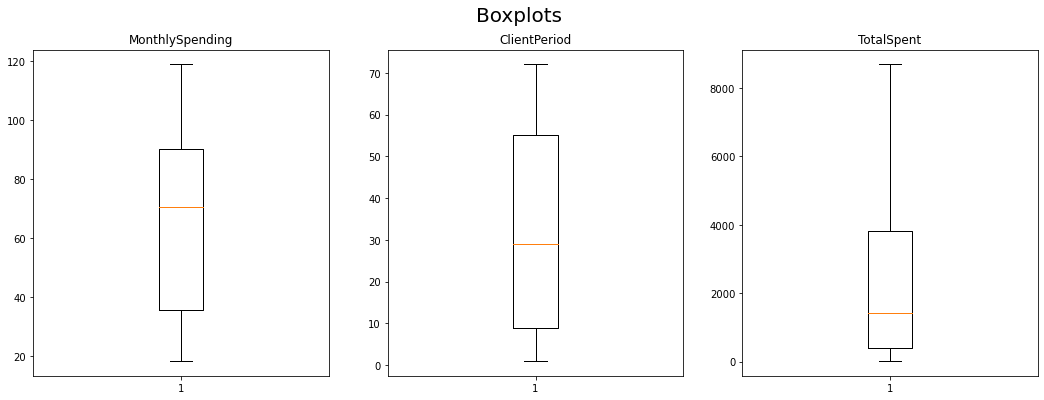

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Boxplots', size=20)

ax[0].boxplot(df['MonthlySpending'])
ax[0].set_title('MonthlySpending')

ax[1].boxplot(df['ClientPeriod'])
ax[1].set_title('ClientPeriod')

ax[2].boxplot(df['TotalSpent'])
ax[2].set_title('TotalSpent')

plt.show()

In [ ]:
# Смотрим распрдление по объектам в датафрейме
df.describe(include='object')

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
count,5273,5273,5273,5273,5273,5273,5273,5273,5273,5273,5273,5273,5273,5273,5273,5273,5273
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
freq,2651,4431,2704,3676,4754,2508,2341,2611,2331,2316,2603,2098,2077,2920,3145,1786,3889


## С какими проблемами столкнули в датафрейме
1. 9 пропусков, по итогу удаленные
2. Некорретные (на мой взгял) тип объекта в паре столбцов

---
# Исследовательский анализ данных. Выводы

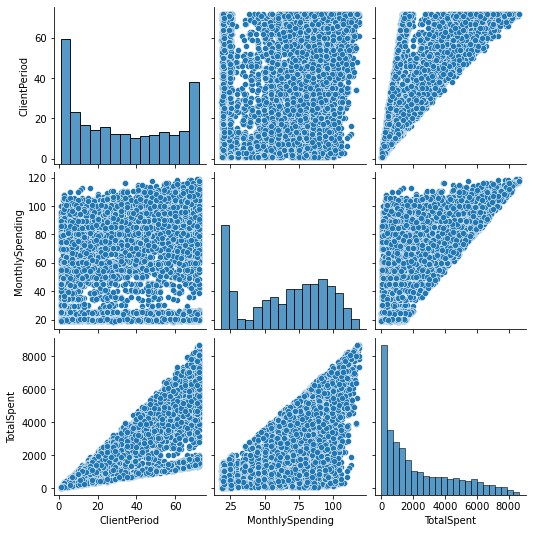

In [ ]:
sns.pairplot(df.select_dtypes(include=['int64', 'float64']))
plt.show()

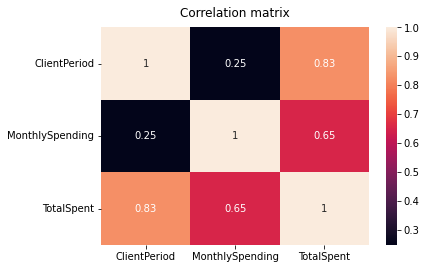

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation matrix', y=1.02)
plt.show()

In [ ]:
# Распределния по object-признакам как ушедших, так и текущих клиентов
def pieplots_builder(data):
    """
    Функция строющая pie-графики по всем столбцам типа object: распределние признаков в каждом столбце
    На вход получаем полный датафрейм: не надо фильтровать столбцы - это делает функция
    На выход получаем графики
    """
    for category in data.select_dtypes(include='object').columns:
        # Churn в графики выводить не надо, поэтому доаьвляю условие
        if category == 'Churn':
            continue
        category_count = data[category].value_counts()
        plt.figure(figsize=(10, 6), facecolor='white')
        plt.pie(category_count.values, labels=category_count.index, autopct='%1.1f%%')
        plt.title(f'Distribution by {category}', size=15)
        plt.show()

В среднем клиент платит за подписку: 61.64 USD
Один клиент у нас в среднем 37.61 месяцев
Характеристики типичного клиента 
 || 
 || 
 VV 



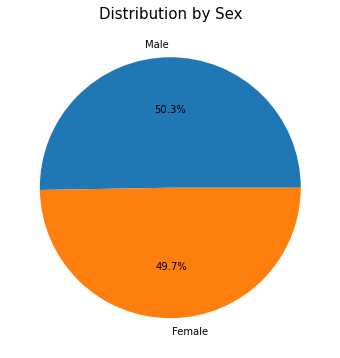

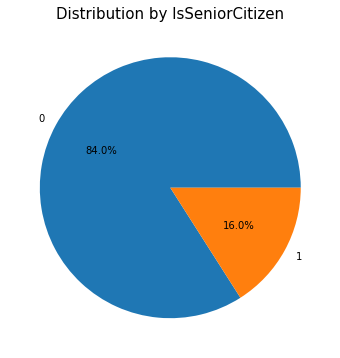

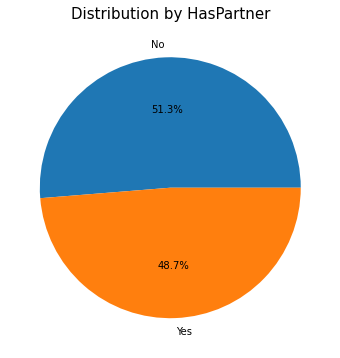

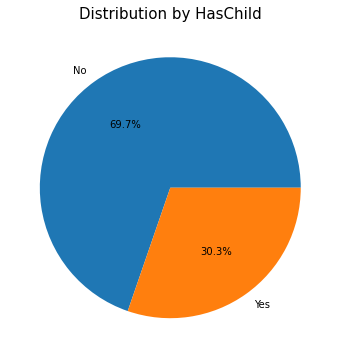

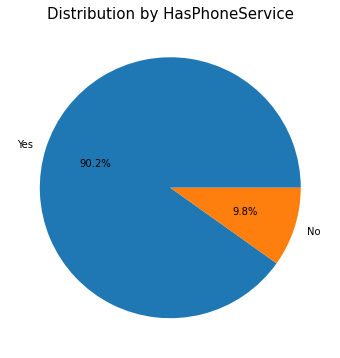

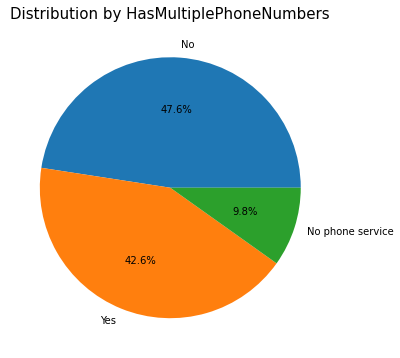

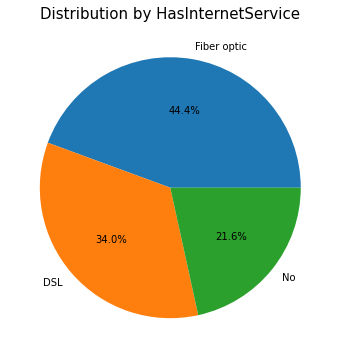

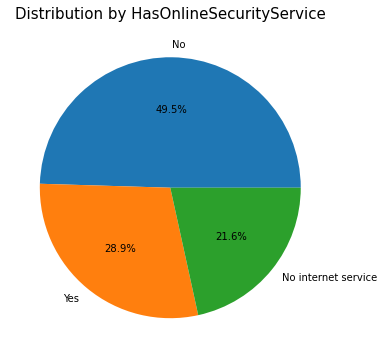

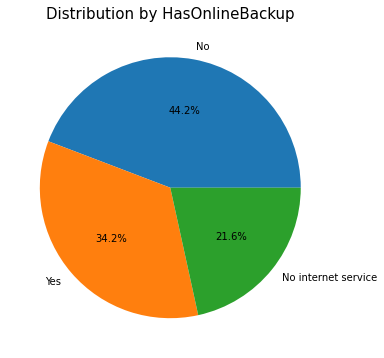

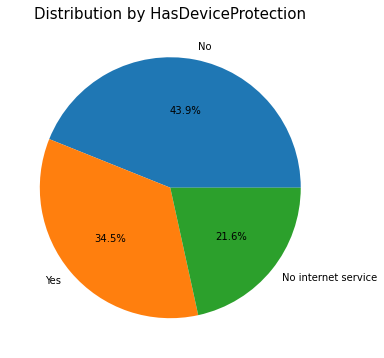

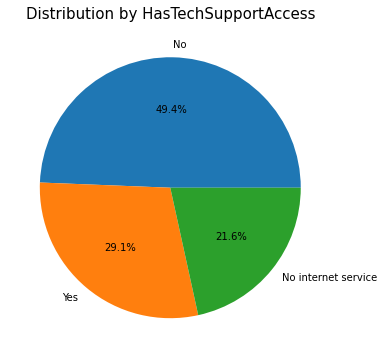

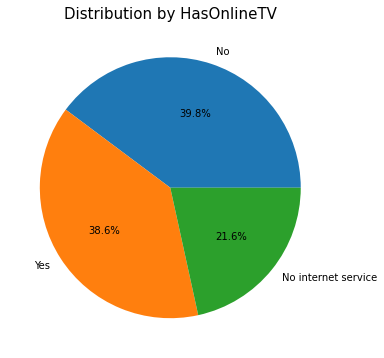

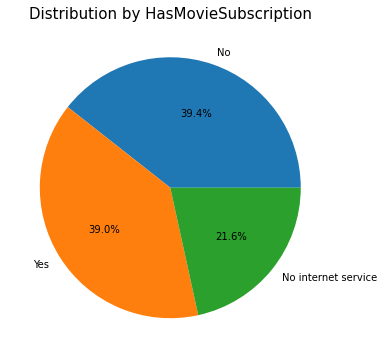

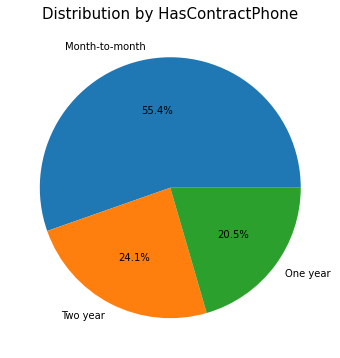

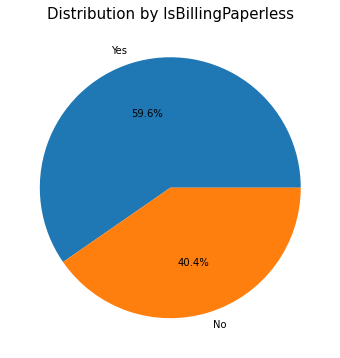

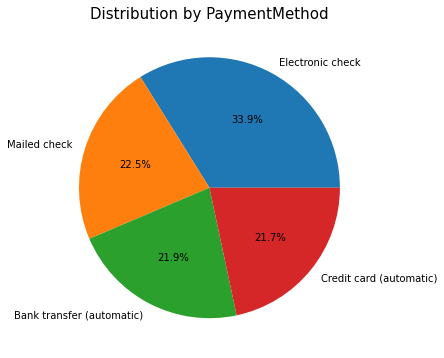

In [ ]:
# Строю пайплоты, чтобы посмотреть как выглядит наш типичный клиент. Беру среднее, т.к. данные без выбросов - значит можем его использовать
print(f'В среднем клиент платит за подписку: {df[df["Churn"] == 0]["MonthlySpending"].mean():.2f} USD')
print(f'Один клиент у нас в среднем {df[df["Churn"] == 0]["ClientPeriod"].mean():.2f} месяцев')
print('Характеристики типичного клиента \n || \n || \n VV \n')
pieplots_builder(df)

# Итоги исследовательского анализа

## Как выглядит наш типичный клиент
Наш клиент это как правило семейный человек с детьми не пенсионного возраста зачастую состоящий в отношениях/брак
Как правило пользуется телефонной и интернет связью (предпочитая оптоволокно) в половине случаев предпочитая контрактную основу.

ТОП-3 наиболее популярных продуктов интернет-услуг
1. каталог фильмов
2. Стриминговое ТВ
3. Антивирус



---
# Портрет пользователя, который ушел. Выводы, какие группы людей чаще уходят.

In [ ]:
# Два отдлеьных датафрейма под ушедших и текущих клиентов
leaved_customers = df[df['Churn'] == 1]
current_customers = df[df['Churn'] == 0]

In [ ]:
print('Leaved Customers')
print(leaved_customers.describe())
print('-'*10)
print('Current Customers')
print(current_customers.describe())

Leaved Customers
       ClientPeriod  MonthlySpending   TotalSpent
count   1384.000000      1384.000000  1384.000000
mean      17.951590        74.281178  1525.831864
std       19.460135        24.551353  1881.443058
min        1.000000        18.950000    19.100000
25%        2.000000        56.437500   134.650000
50%       10.000000        79.500000   706.725000
75%       29.000000        94.200000  2352.550000
max       72.000000       118.350000  8684.800000
----------
Current Customers
       ClientPeriod  MonthlySpending   TotalSpent
count   3889.000000      3889.000000  3889.000000
mean      37.612754        61.638442  2563.834045
std       24.083920        31.281198  2332.182253
min        1.000000        18.250000    18.800000
25%       15.000000        25.100000   568.200000
50%       37.000000        64.800000  1714.550000
75%       61.000000        89.150000  4284.200000
max       72.000000       118.750000  8672.450000


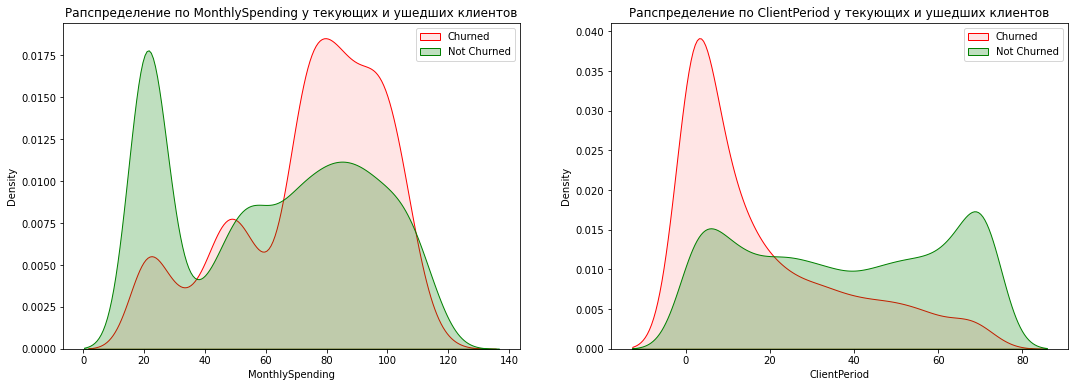

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.kdeplot(leaved_customers['MonthlySpending'], label='Churned', fill=True, color='red', alpha=0.1, ax=ax[0])
sns.kdeplot(current_customers['MonthlySpending'], label='Not Churned', fill=True, color='green', ax=ax[0])
ax[0].set_title('Рапспределение по MonthlySpending у текующих и ушедших клиентов')
ax[0].legend()

sns.kdeplot(leaved_customers['ClientPeriod'], label='Churned', fill=True, color='red', alpha=0.1, ax=ax[1])
sns.kdeplot(current_customers['ClientPeriod'], label='Not Churned', fill=True, color='green', ax=ax[1])
ax[1].set_title('Рапспределение по ClientPeriod у текующих и ушедших клиентов')
ax[1].legend()

plt.show()

### Подытоги по графикам
1. Проблема с удержанием клиентов в первые месяцы - большой отток
2. Также повышенный отток в дорогом ценовом сегменте

<Figure size 1296x720 with 0 Axes>

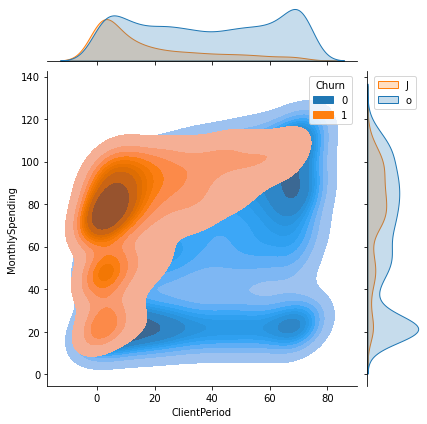

In [ ]:
# Хочу проверить теорию, что на начальных этапах могут отваливаться клиенты из-за выскоих цен.
plt.figure(figsize=(18, 10))
sns.jointplot(data=df, x='ClientPeriod', y='MonthlySpending', kind='kde', hue='Churn', fill=True)
plt.legend('Joinplot ClientPeriod by MonthlySpending')
plt.show()

### Подытог по графику
1. Теория, что клиенты отваливаются только из-за выосокой цены - неверна:
    Высокоценовой сегмент клиентов существует, но в основном из существующих клиентов
2. В отличии от новых клиентов, которые в половине случаев (верхняя часть графика) попадают в высокоценовой сегмент и как следвие отваливаются.

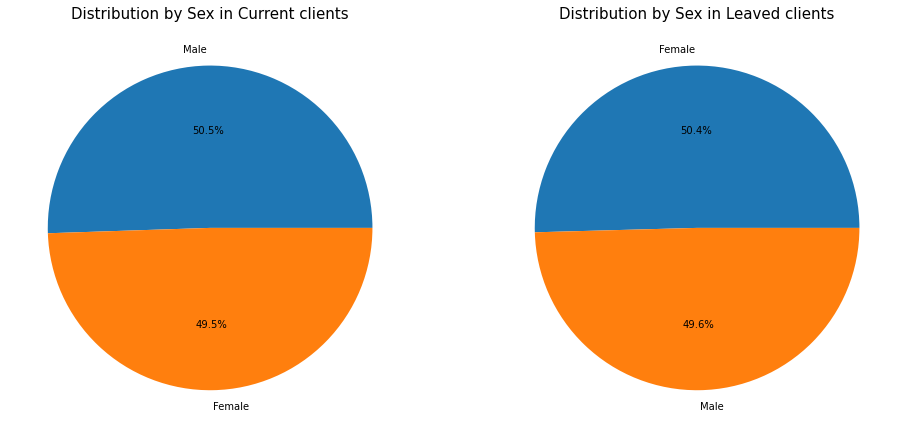

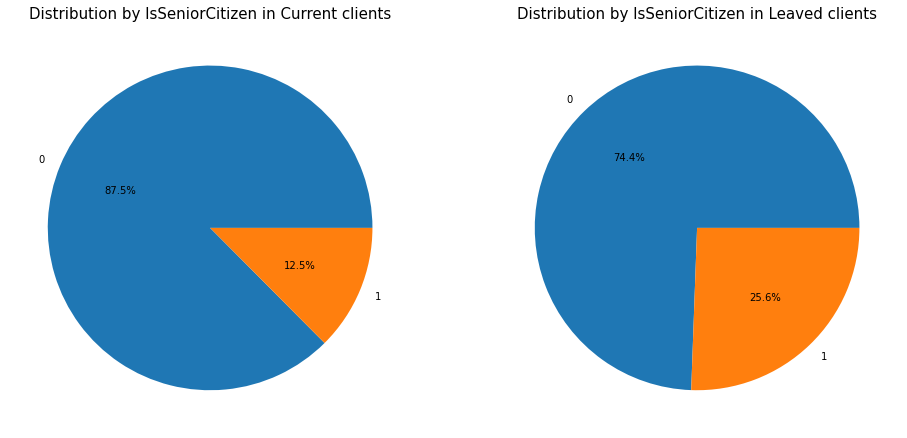

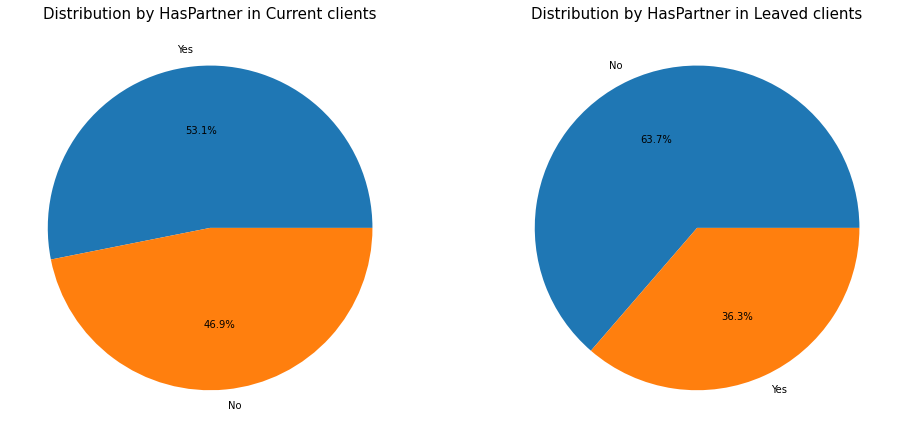

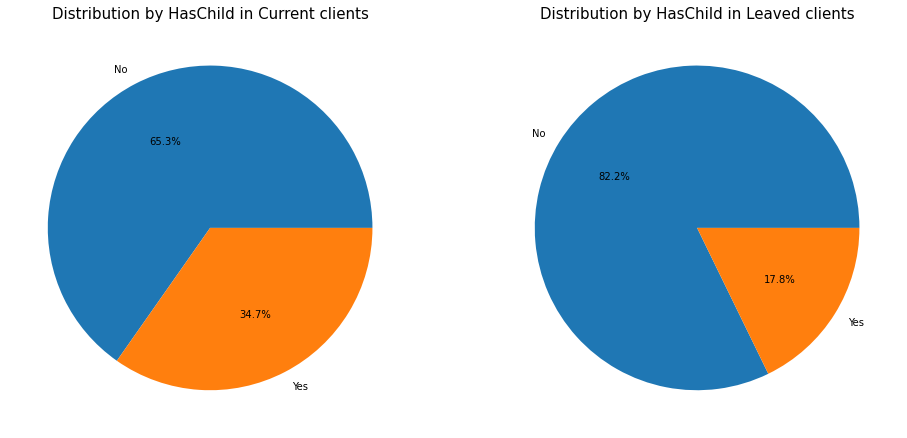

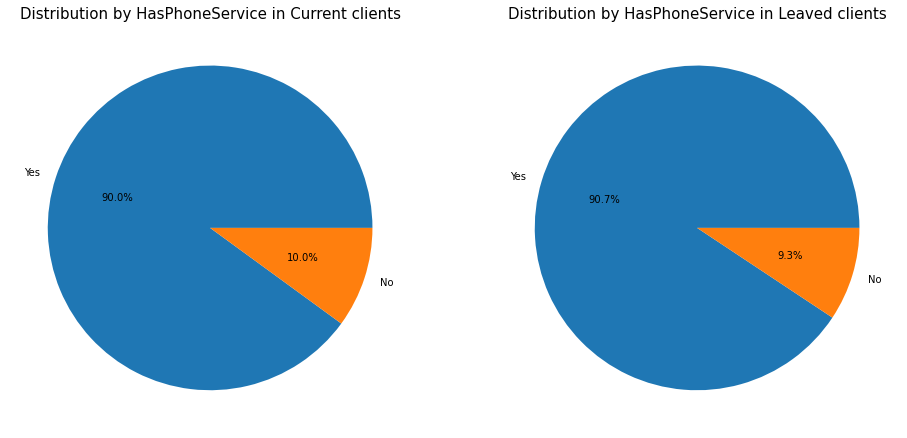

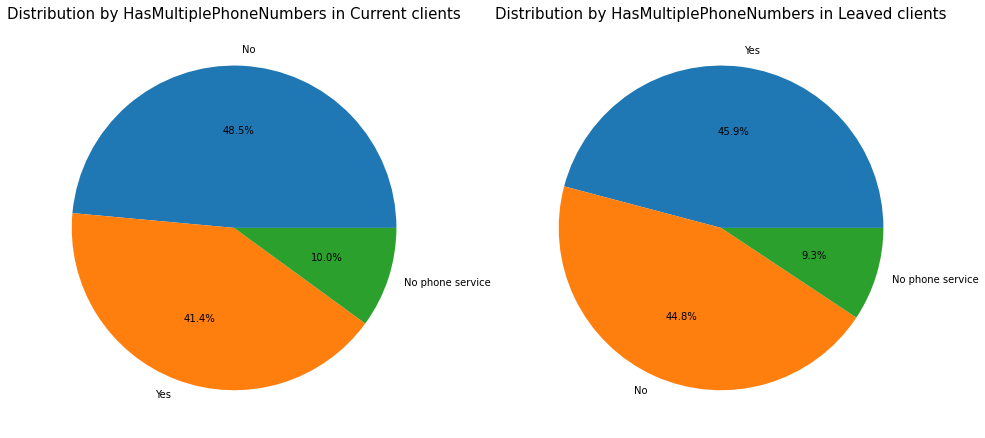

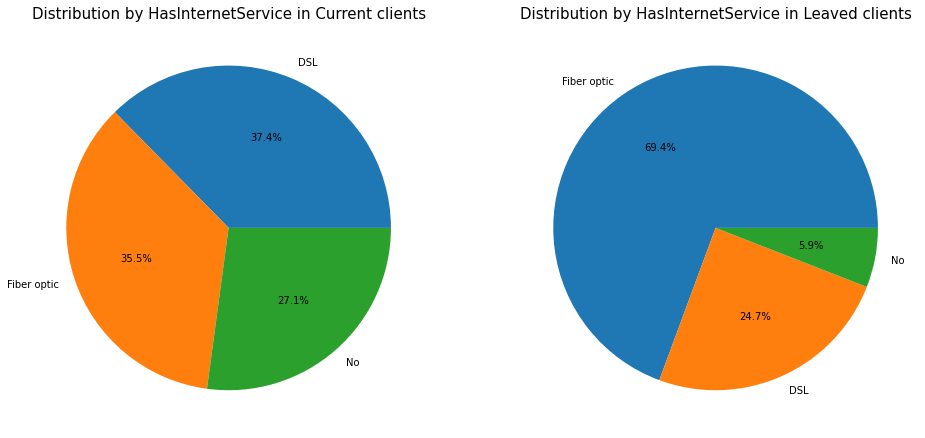

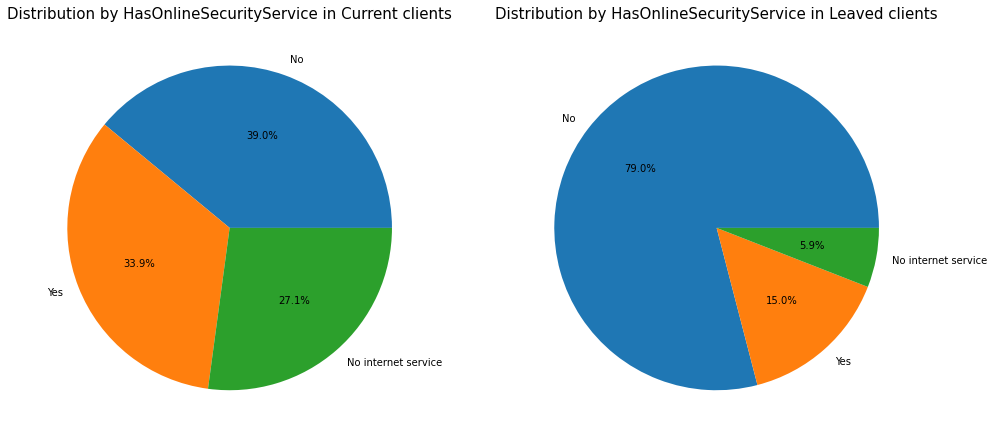

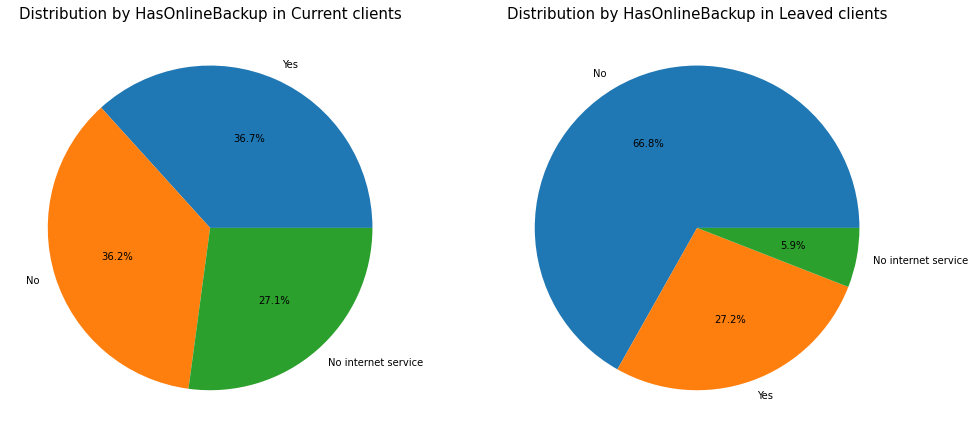

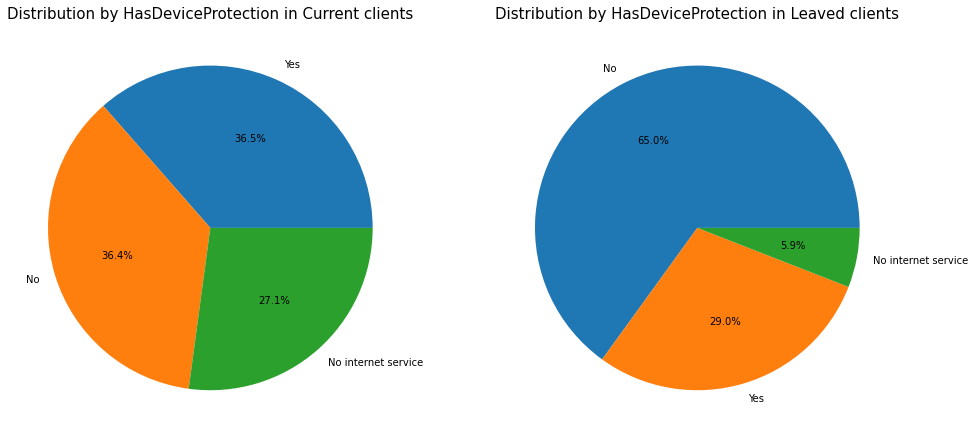

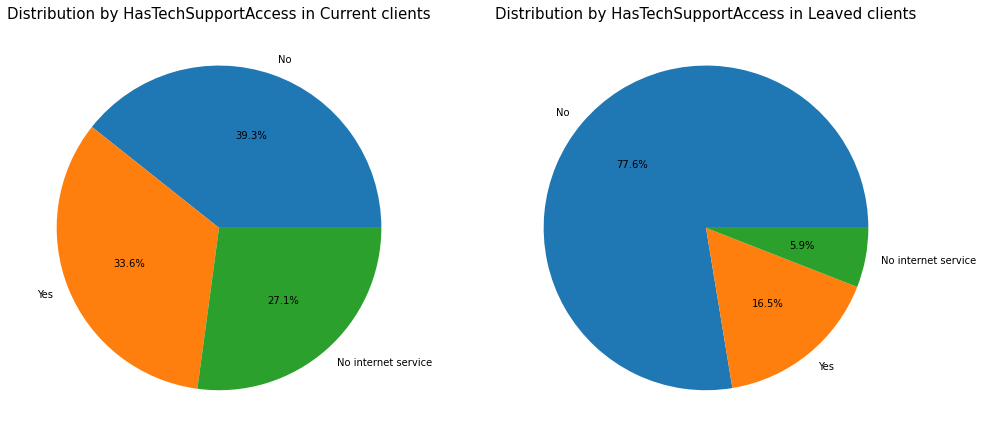

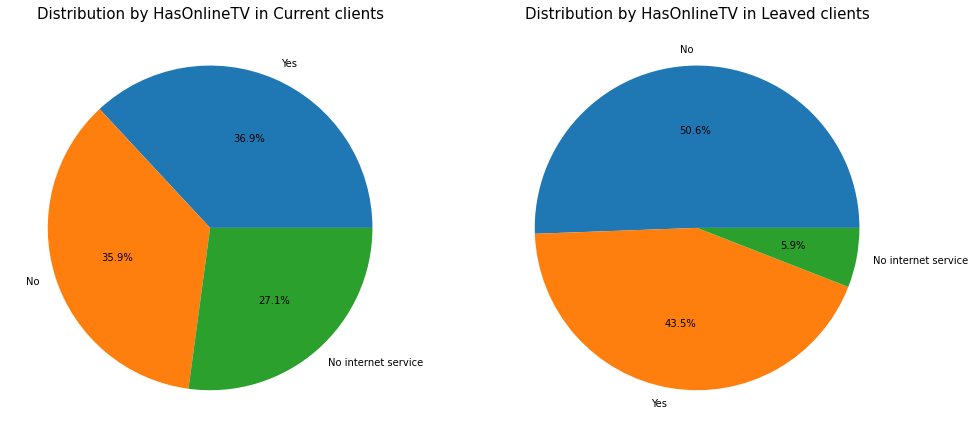

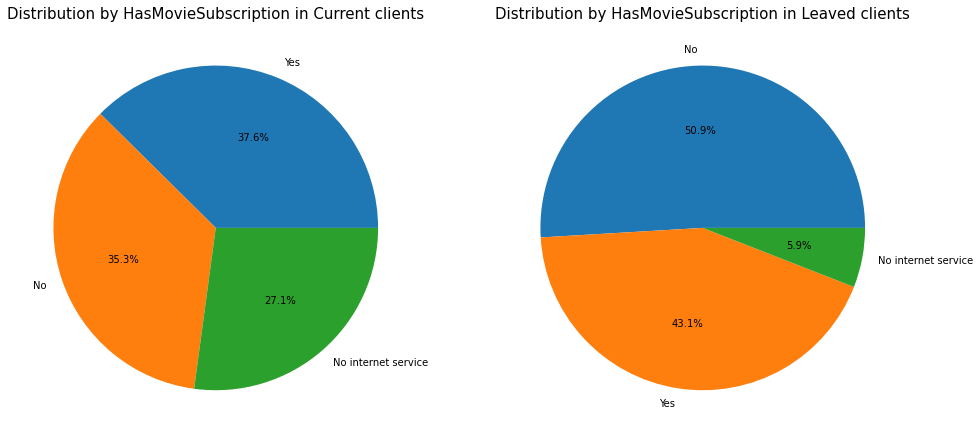

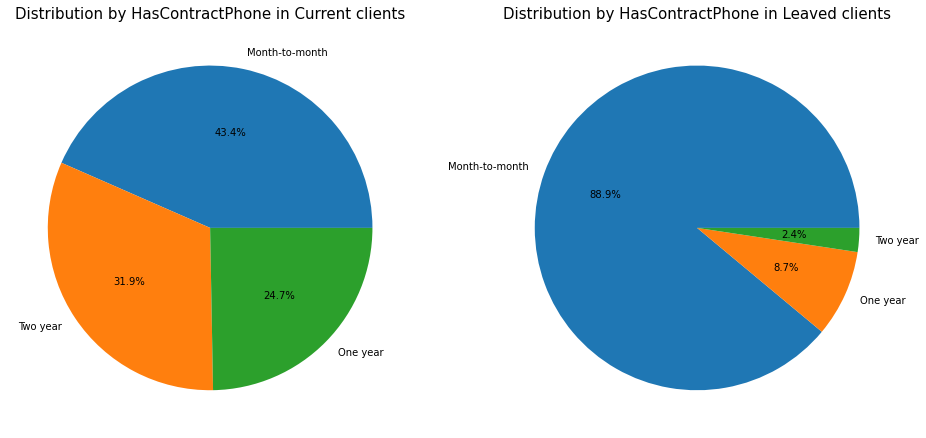

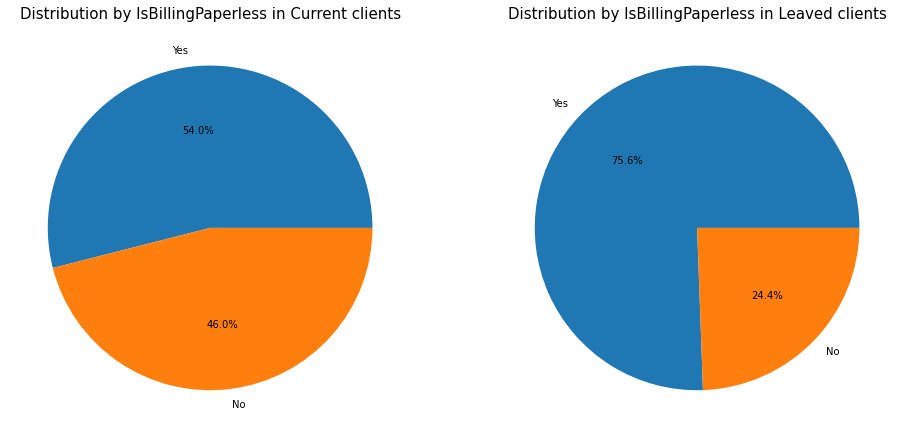

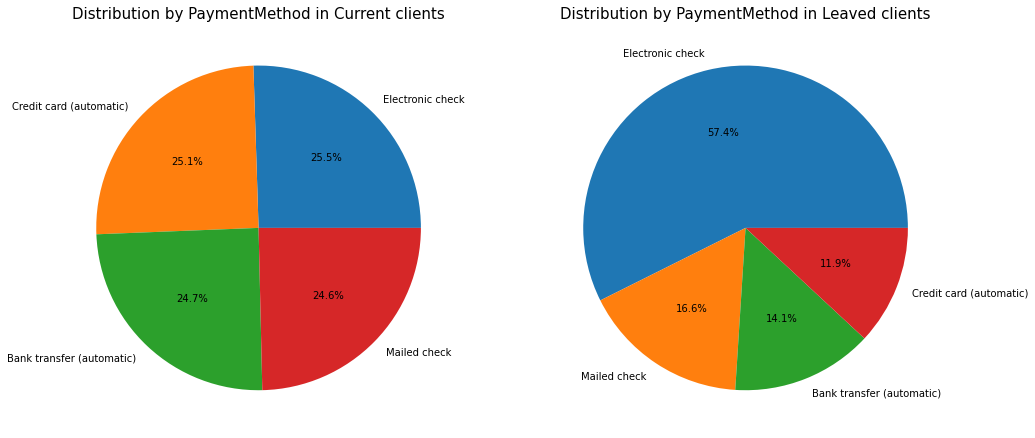

In [ ]:
# Сравннеие признаков ушедших и текущих клиентов
for category in df.select_dtypes(include='object').columns:
    if category == 'Churn':
        continue

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), facecolor='white')

    leaved = leaved_customers[category].value_counts()
    current = current_customers[category].value_counts()

    ax1.pie(current.values, labels=current.index, autopct='%1.1f%%')
    ax1.set_title(f'Distribution by {category} in Current clients', size=15)

    ax2.pie(leaved.values, labels=leaved.index, autopct='%1.1f%%')
    ax2.set_title(f'Distribution by {category} in Leaved clients', size=15)

    plt.show()

In [ ]:
print(f"Среднее время жизни у ушедших клиентов: {df[df['Churn'] == 1]['ClientPeriod'].mean():.2f} месяца")
print(f"Среднее время жизни у текущих клиентов: {df[df['Churn'] == 0]['ClientPeriod'].mean():.2f} месяца")
print(f"Средний платеж в месяц у ушедших клиентов: {df[df['Churn'] == 1]['MonthlySpending'].mean():.2f} USD")
print(f"Средний платеж в месяц у текущих клиентов: {df[df['Churn'] == 0]['MonthlySpending'].mean():.2f} USD")

Среднее время жизни у ушедших клиентов: 17.95 месяца
Среднее время жизни у текущих клиентов: 37.61 месяца
Средний платеж в месяц у ушедших клиентов: 74.28 USD
Средний платеж в месяц у текущих клиентов: 61.64 USD


## Портрет пользователя, который ушел
- Контракт с помесячной оплатой
- Оптоволоконный интеренет
- Активный пользователь доп. улуг
- Биллинг - безбумажный
- Оплата - электронный чер
- Довольно высокий ещемесячный платеж 74+ USD в среднем

## Что я бы предложил по улучшениям (дополнительно)
1. Старался бы выводить людей на долгосрочные договоры по средствам доп. скидок. Возможно в моменте можем потерять часть прибыли, но на долгий срок вложение окупится
2. Рекламировать и рекомендовать автоматические оплаты: люди забывают отписываться от подписок (не совсем их формат, но мысль похожа), поэтому сможем удержать дополинтельную часть клиентов
3. Дополнительная реклама доп. услгу - они и так пользуются популярностью, даже ушедшие клиенты ими пользовались, поэтмоу можно использовать, как продукт для удержания
4. Самое радикальное!!! Переоценил или проанализировал дополнительное дорогие пакеты, потому что не так много пользоватей, на мой вщгялд, которым нужен весь спект услуг, при этом новички платят на начальных этапах много. Возможно стоит проанализировать и скорретировать цены, чтобы люди на начальных этапах не отваливались